In [2]:
import seaborn as sns
from matplotlib.font_manager import fontManager, FontProperties
from paths import TEST_OUTPUT_DIR
import pandas as pd

In [3]:
path = "NotoSansTC-Medium.ttf"
fontManager.addfont(path)

prop = FontProperties(fname=path)
sns.set(font=prop.get_name())

In [4]:
all_tags = "guitar, classical, slow, techno, strings, drums, electronic, rock, fast, piano, ambient, beat, violin, vocal, synth, female, indian, opera, male, singing, vocals, no vocals, harpsichord, loud, quiet, flute, woman, male vocal, no vocal, pop, soft, sitar, solo, man, classic, choir, voice, new age, dance, male voice, female vocal, beats, harp, cello, no voice, weird, country, metal, female voice, choral"
all_tags = all_tags.split(", ")

In [5]:
valid_tags = [
    "guitar",
    "techno",
    "electronic",
    "rock",
    "piano",
    "ambient",
    "indian",
    "opera",
    "dance",
    "country",
    "new age",
    "metal",
]

In [6]:
import numpy as np

with open(TEST_OUTPUT_DIR / "test_musicnn.npy", "rb") as f:
    arr = np.load(f)

In [7]:
summarized_arr = np.zeros((len(valid_tags), len(valid_tags)))

for tag_i, tag in enumerate(all_tags):
    if tag in valid_tags:
        summarized_arr[:, valid_tags.index(tag)] = arr[:, tag_i]

[Text(0.5, 1.0, '實際音樂類型與預測音樂類型之關聯熱圖'),
 Text(0.5, 17.049999999999997, '預測類型 (musicnn)'),
 Text(44.25, 0.5, '實際類型 (spotify-track-dataset)')]

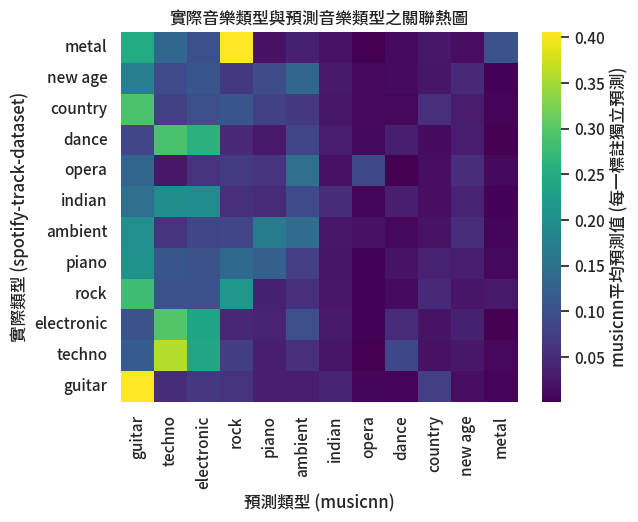

In [8]:
import pandas as pd

summarized_arr = np.flip(summarized_arr, axis=0)

df = pd.DataFrame(summarized_arr, index=valid_tags[::-1], columns=valid_tags)
fig = sns.heatmap(df, cmap=sns.color_palette("viridis", as_cmap=True),
                  cbar_kws={"label": "musicnn平均預測值 (每一標註獨立預測)"})
fig.set(title="實際音樂類型與預測音樂類型之關聯熱圖", xlabel="預測類型 (musicnn)",
        ylabel="實際類型 (spotify-track-dataset)")